# Chapter 4: Community Detection

Please implement Modularity Optimization in this notebook. Refrain from directly calling the built-in functions from libraries other than those imported.

In [3]:
import numpy as np
import networkx as nx
from sklearn.cluster import KMeans
from scipy.sparse.linalg import eigsh

In [23]:
def modularity_matrix(G: nx.Graph) -> np.ndarray:
    """
    Compute the modularity matrix B for graph G.
    Args:
        G: a networkx graph
    Returns:
        B: a numpy array representing the modularity matrix
    """
    # TODO: Implement this function
    nodes = list(G.nodes())
    A = nx.to_numpy_array(G, nodelist=nodes)
    k = np.array([G.degree(n) for n in nodes])

    m = G.number_of_edges()
    if m == 0:
        return np.zeros_like(A)
        
    B = A - np.outer(k, k) / (2 * m)
    return B

def top_eigenvectors(B: np.ndarray, k: int) -> np.ndarray:
    """
    Compute the top k eigenvectors of the modularity matrix B.
    """
    # Compute the k largest eigenvalues and corresponding eigenvectors
    eigvals, eigvecs = eigsh(B, k=k, which='LA')
    return eigvecs

def community_detection_with_modularity(G: nx.Graph, k: int) -> np.ndarray:
    """
    Detect communities in graph G using modularity maximization.
    """
    B = modularity_matrix(G)
    eigvecs = top_eigenvectors(B, k)  # Top k eigenvectors
    
    # TODO: Finish implementation
    rows_norm = np.linalg.norm(eigvecs, axis=1, keepdims=True)
    eigvecs_normalized = eigvecs / (rows_norm + 1e-12)
    
    # 对归一化后的特征向量进行聚类
    community_labels = KMeans(n_clusters=k, random_state=0).fit_predict(eigvecs_normalized)
    return community_labels

def modularity_score(G, community_labels):
    """
    Calculate modularity score for a partition of graph G.
    """
    A = nx.to_numpy_array(G)
    degrees = A.sum(axis=1)
    m = A.sum() / 2
    Q = 0.0
    
    for i in range(len(community_labels)):
        for j in range(len(community_labels)):
            if community_labels[i] == community_labels[j]:
                Q += A[i, j] - (degrees[i] * degrees[j]) / (2 * m)
    return Q / (2 * m)



In [29]:
G = nx.karate_club_graph()

# Set the number of communities (you may play with this parameter)
k = 4

# Detect communities
community_labels = community_detection_with_modularity(G, k)

# Calculate modularity score for the detected partition
Q = modularity_score(G, community_labels)
print("Modularity Score:", Q)

# Print community labels
print("Community labels for each node:", community_labels)

Modularity Score: 0.4352617079889811
Community labels for each node: [1 1 1 1 3 3 3 1 0 0 3 3 1 1 0 0 3 1 0 1 0 1 0 2 2 2 0 2 2 0 0 2 0 0]


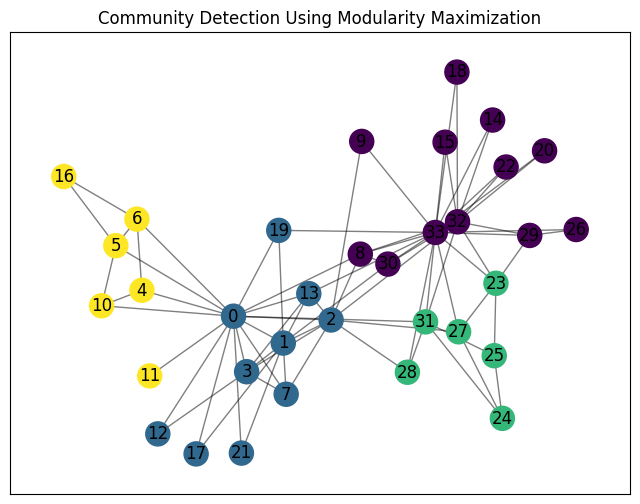

In [30]:
import matplotlib.pyplot as plt

# Color nodes by their community labels
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_color=community_labels, cmap='viridis', node_size=300)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.title("Community Detection Using Modularity Maximization")
plt.show()

---
# Discussions

聚类的时候，对特征值归一化是必要的。不归一化就会导致结果的偏移